In [36]:
#Alejandro Gonzalez alejandro.gonzalez10@utp.ac.pa
#Jordy Rosales jordy.rosales@utp.ac.pa
#Alfonso Rodriguez alfonso.rodriguez1@ut.ac.pa

In [37]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score, KFold

In [38]:
data=pd.read_table("Source/DataProblema2.txt", sep="   ") #Guardar el archuvo CSV en la varible data.
data

C:\Users\adga2\AppData\Local\Temp\ipykernel_3000\1646607187.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  data=pd.read_table("Source/DataProblema2.txt", sep="   ") #Guardar el archuvo CSV en la varible data.


,x,Unnamed: 1,Unnamed: 2,y
0,0.4170,0.0209,NaN,NaN
1,0.7203,-0.0426,NaN,NaN
2,0.0001,-0.1184,NaN,NaN
3,0.3023,0.0249,NaN,NaN
4,0.1468,-0.0223,NaN,NaN
5,0.0923,-0.0485,NaN,NaN
6,0.1863,-0.0150,NaN,NaN
7,0.3456,0.0209,NaN,NaN
8,0.3968,0.0046,NaN,NaN
9,0.5388,-0.0057,NaN,NaN


In [39]:
data.pop('Unnamed: 2')  #Eliminar las columnas NaN
data.pop('y') 

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
10   NaN
11   NaN
12   NaN
13   NaN
14   NaN
15   NaN
16   NaN
17   NaN
18   NaN
19   NaN
20   NaN
21   NaN
22   NaN
23   NaN
24   NaN
25   NaN
26   NaN
27   NaN
28   NaN
29   NaN
Name: y, dtype: float64

In [40]:
data

,x,Unnamed: 1
0,0.4170,0.0209
1,0.7203,-0.0426
2,0.0001,-0.1184
3,0.3023,0.0249
4,0.1468,-0.0223
5,0.0923,-0.0485
6,0.1863,-0.0150
7,0.3456,0.0209
8,0.3968,0.0046
9,0.5388,-0.0057


In [41]:
data.rename(columns = {'Unnamed: 1':'y'}, inplace = True)

In [42]:
data

,x,y
0,0.4170,0.0209
1,0.7203,-0.0426
2,0.0001,-0.1184
3,0.3023,0.0249
4,0.1468,-0.0223
5,0.0923,-0.0485
6,0.1863,-0.0150
7,0.3456,0.0209
8,0.3968,0.0046
9,0.5388,-0.0057


In [43]:
x=data['x']
y=data['y']

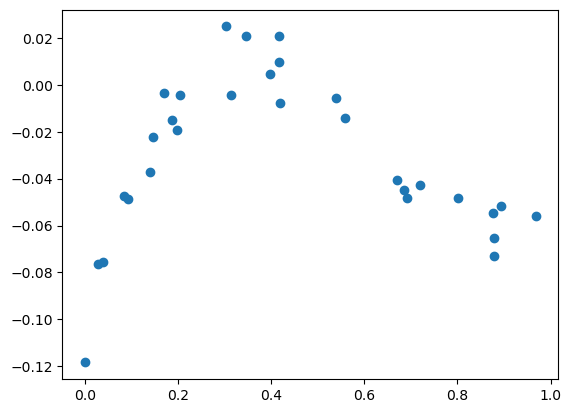

In [44]:
plt.scatter(x,y)
plt.show()

In [45]:
x_train=x.to_frame()  #Convertir a DataFrame.

In [46]:
x_train.insert(loc=0, column='vector', value=1) #Agregar el vector de intersecto.
x_cuad_train=x_train.copy()
x_cuad_train.insert(loc=2, column='cuadratico', value=x**2)

In [47]:
x_train

,vector,x
0,1,0.4170
1,1,0.7203
2,1,0.0001
3,1,0.3023
4,1,0.1468
5,1,0.0923
6,1,0.1863
7,1,0.3456
8,1,0.3968
9,1,0.5388


In [48]:
x_train=x_train.to_numpy()   #Convertir a np array
x_cuad_train=x_cuad_train.to_numpy()

In [49]:
x_train

array([[1.000e+00, 4.170e-01],
       [1.000e+00, 7.203e-01],
       [1.000e+00, 1.000e-04],
       [1.000e+00, 3.023e-01],
       [1.000e+00, 1.468e-01],
       [1.000e+00, 9.230e-02],
       [1.000e+00, 1.863e-01],
       [1.000e+00, 3.456e-01],
       [1.000e+00, 3.968e-01],
       [1.000e+00, 5.388e-01],
       [1.000e+00, 4.192e-01],
       [1.000e+00, 6.852e-01],
       [1.000e+00, 2.045e-01],
       [1.000e+00, 8.781e-01],
       [1.000e+00, 2.740e-02],
       [1.000e+00, 6.705e-01],
       [1.000e+00, 4.173e-01],
       [1.000e+00, 5.587e-01],
       [1.000e+00, 1.404e-01],
       [1.000e+00, 1.981e-01],
       [1.000e+00, 8.007e-01],
       [1.000e+00, 9.683e-01],
       [1.000e+00, 3.134e-01],
       [1.000e+00, 6.923e-01],
       [1.000e+00, 8.764e-01],
       [1.000e+00, 8.946e-01],
       [1.000e+00, 8.500e-02],
       [1.000e+00, 3.910e-02],
       [1.000e+00, 1.698e-01],
       [1.000e+00, 8.781e-01]])

In [50]:
def pesos(x,y):    #Funcion para calcular los pesos.
    w=np.linalg.inv(x.T@x)@x.T@y
    return w

In [51]:
w_lineal=pesos(x_train,y) #Calcular los pesos

In [52]:
print('Pesos lineal:', w_lineal)

Pesos lineal: [-0.02575257 -0.01313003]


In [53]:
y_pred=x_train@w_lineal  #Calculas las predicciones

In [54]:
y_pred

array([-0.03122779, -0.03521013, -0.02575388, -0.02972178, -0.02768006,
       -0.02696447, -0.0281987 , -0.03029031, -0.03096257, -0.03282703,
       -0.03125668, -0.03474927, -0.02843766, -0.03728205, -0.02611233,
       -0.03455626, -0.03123173, -0.03308832, -0.02759603, -0.02835363,
       -0.03626579, -0.03846638, -0.02986752, -0.03484249, -0.03725973,
       -0.0374987 , -0.02686862, -0.02626596, -0.02798205, -0.03728205])

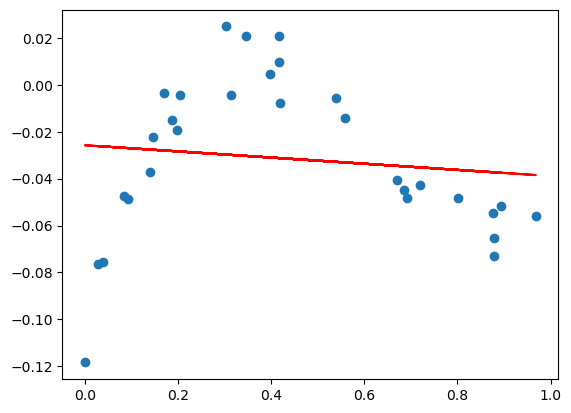

In [55]:
plt.scatter(x, y)
plt.plot(x, y_pred, '-r')
plt.show()

In [56]:
x_cuad_train

array([[1.0000000e+00, 4.1700000e-01, 1.7388900e-01],
       [1.0000000e+00, 7.2030000e-01, 5.1883209e-01],
       [1.0000000e+00, 1.0000000e-04, 1.0000000e-08],
       [1.0000000e+00, 3.0230000e-01, 9.1385290e-02],
       [1.0000000e+00, 1.4680000e-01, 2.1550240e-02],
       [1.0000000e+00, 9.2300000e-02, 8.5192900e-03],
       [1.0000000e+00, 1.8630000e-01, 3.4707690e-02],
       [1.0000000e+00, 3.4560000e-01, 1.1943936e-01],
       [1.0000000e+00, 3.9680000e-01, 1.5745024e-01],
       [1.0000000e+00, 5.3880000e-01, 2.9030544e-01],
       [1.0000000e+00, 4.1920000e-01, 1.7572864e-01],
       [1.0000000e+00, 6.8520000e-01, 4.6949904e-01],
       [1.0000000e+00, 2.0450000e-01, 4.1820250e-02],
       [1.0000000e+00, 8.7810000e-01, 7.7105961e-01],
       [1.0000000e+00, 2.7400000e-02, 7.5076000e-04],
       [1.0000000e+00, 6.7050000e-01, 4.4957025e-01],
       [1.0000000e+00, 4.1730000e-01, 1.7413929e-01],
       [1.0000000e+00, 5.5870000e-01, 3.1214569e-01],
       [1.0000000e+00, 1.404

In [57]:
w_cuad=pesos(x_cuad_train, y)

In [58]:
y_cuad=x_cuad_train@w_cuad

In [59]:
y_cuad=pd.DataFrame(y_cuad, x)

In [60]:
y_cuad

,0
x,
0.4170,0.002178
0.7203,-0.023117
0.0001,-0.076168
0.3023,-0.006318
0.1468,-0.033666
0.0923,-0.047563
0.1863,-0.024993
0.3456,-0.001946
0.3968,0.001401


In [61]:
y_sorted=y_cuad.sort_values(by='x')
y_sorted

,0
x,
0.0001,-0.076168
0.0274,-0.067031
0.0391,-0.063287
0.0850,-0.049594
0.0923,-0.047563
0.1404,-0.035182
0.1468,-0.033666
0.1698,-0.028473
0.1863,-0.024993


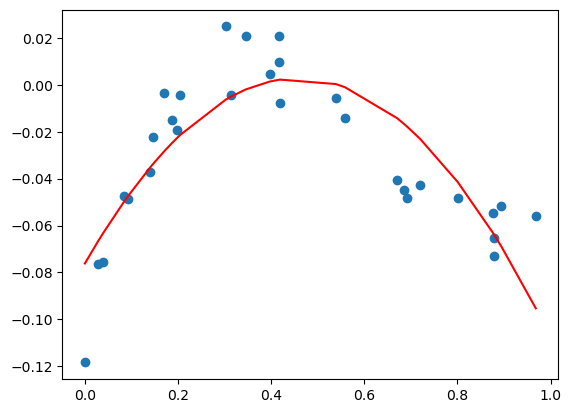

In [62]:
plt.scatter(x, y)
plt.plot(y_sorted,'-r')

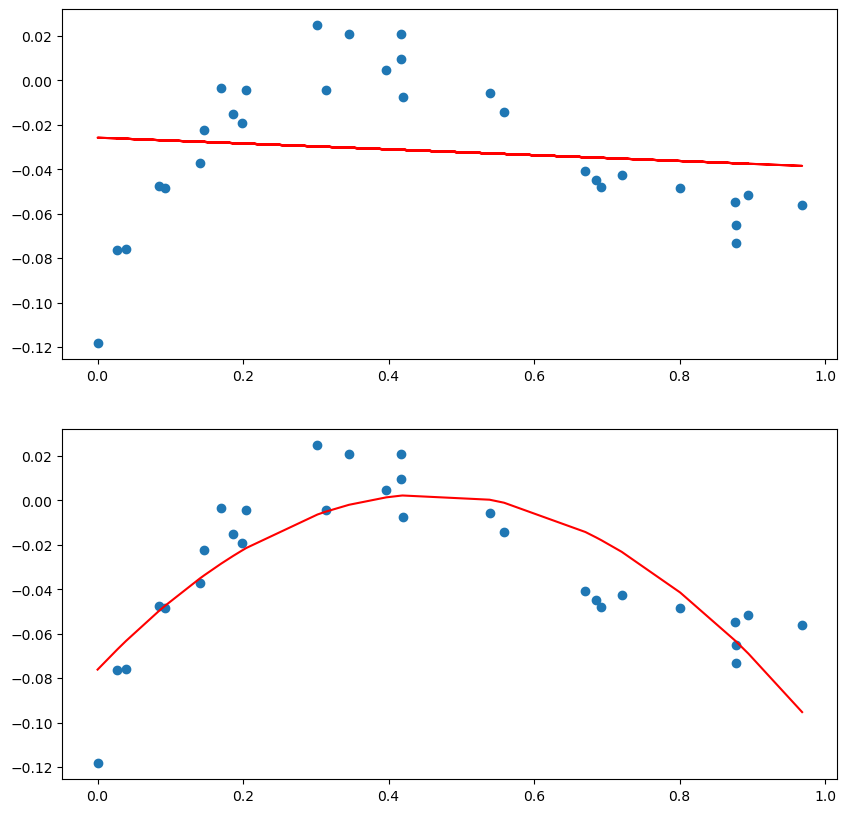

In [63]:
fig, axes=plt.subplots(2,1,figsize=(10,10))    #Subplottear cada variable en una sola burbuja.
axes[0].scatter(x, y)
axes[0].plot(x, y_pred, '-r')
axes[1].scatter(x,y)
axes[1].plot(y_sorted,'-r')

In [29]:
x=x.to_numpy()

In [30]:
ordenes = [1, 2]
val_errors = []
errores = []

In [31]:
for i in ordenes:
    modelo = PolynomialFeatures(degree=i)   #Utilizar la regresion dependiendo del orden.
    x_plynom = modelo.fit_transform(x.reshape(-1, 1))   #Meter la data en el modelo.
    kf = KFold(n_splits=len(x))          #Traer el modelo de validacion cruzada.
    
    for train_index, test_index in kf.split(x_plynom): 
        X_train, X_test = x_plynom[train_index], x_plynom[test_index]  #Separar la data de validacion y entrenamiento.
        y_train, y_test = y[train_index], y[test_index]
        
        regressor = LinearRegression()   #Crear el modelo de Regresion Lineal.
        regressor.fit(X_train, y_train)  #Ingresar los datos de entrenamiento en el modelo.
        y_pred = regressor.predict(X_test)   #Predecir con los datos de validacion.
        error = np.mean((y_pred - y_test) ** 2)   #Comprobar el error cuadratico medio.
        errores.append(error)   #Almacenar el error.
    
    ECM = np.mean(errores)    #Calcular el promedio de los errores cuadraticos medios.
    val_errors.append(ECM)    #Almacenarlos.


Error de validación para orden 1: 0.0012769582085646256
Error de validación para orden 2: 0.0008720528252361506


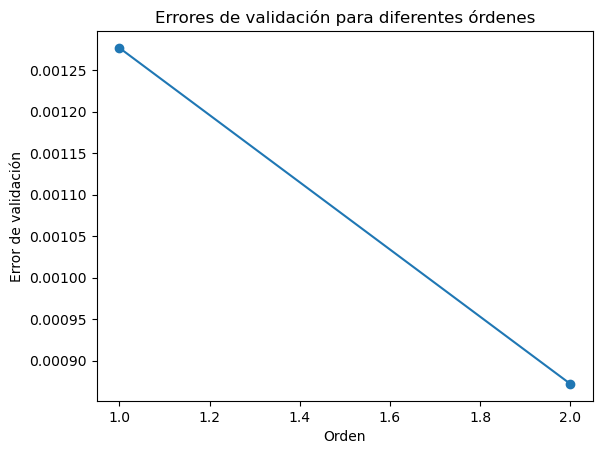

El mejor orden es 2 ya que produce el menor error de validación promedio.


In [32]:
for i, order in enumerate(ordenes):
    print(f'Error de validación para orden {order}: {val_errors[i]}')

plt.plot(ordenes, val_errors, marker='o')
plt.xlabel('Orden')
plt.ylabel('Error de validación')
plt.title('Errores de validación para diferentes órdenes')
plt.show()

mejor_modelo = ordenes[np.argmin(val_errors)]
print(f"El mejor orden es {mejor_modelo} ya que produce el menor error de validación promedio.")